In [1]:
## Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

In [6]:
## Get and Copy Dataset
raw_dataset = pd.read_csv('processed.csv',delimiter=',')
dataset = raw_dataset.copy()

## Clean The Data
dataset.isna().sum() #Check N/A Data
# dataset = dataset.dropna() #Clean N/A Data
dataset = dataset[dataset['target']!=0]
dataset

,acc_x_max,acc_y_max,acc_z_max,acc_x_min,acc_y_min,acc_z_min,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_var,...,gyr_y_mean,gyr_z_mean,gyr_x_var,gyr_y_var,gyr_z_var,stride_frequency,temperature,heading,estimasi,target
0,7.48,14.62,6.17,-10.44,0.49,-0.88,-2.812200,10.657000,2.684800,15.724000,...,-0.014348,0.190000,0.680050,0.298640,7.048900,23,28.720000,NaN,NaN,93
1,5.95,14.04,6.86,-11.04,5.88,-1.81,-2.445800,9.866800,2.302600,24.287000,...,-0.026316,0.104210,0.239150,0.243160,4.595800,19,29.093000,NaN,NaN,67
2,4.92,30.69,5.80,-10.10,0.86,-1.32,-1.987000,10.883000,2.523000,12.369000,...,-0.101740,0.118700,0.829350,0.699710,6.076900,23,29.284000,NaN,NaN,81
3,9.18,17.31,8.69,-16.19,0.20,-2.53,-3.145200,11.738000,3.459100,35.061000,...,-0.120430,0.108700,1.527800,0.572410,10.800000,23,30.053000,NaN,NaN,103
4,5.98,21.28,5.20,-9.29,6.34,-0.11,-2.151500,10.670000,2.310500,20.608000,...,0.038500,0.053500,0.613120,0.425560,4.156100,20,30.163000,NaN,NaN,64
5,8.84,15.99,8.76,-18.33,6.89,-3.36,-3.774300,11.422000,3.410000,29.325000,...,-0.019130,0.072174,1.505200,0.755210,10.699000,23,30.352000,NaN,NaN,105
6,5.87,15.30,6.92,-11.37,-1.82,-2.67,-2.244200,10.546000,2.671300,19.140000,...,-0.001250,0.099583,1.389200,0.476650,9.051800,24,30.441000,NaN,NaN,95
7,4.80,15.45,5.81,-8.84,-2.12,-0.05,-2.276100,10.394000,2.486500,12.629000,...,-0.063043,0.089130,0.664980,0.317180,7.518300,23,30.614000,NaN,NaN,80
8,8.00,25.90,7.70,-15.05,0.87,-4.50,-2.592300,11.874000,3.098200,28.008000,...,-0.074091,-0.047727,1.193500,0.878280,9.324000,22,30.622000,NaN,NaN,97
9,4.62,15.72,8.56,-12.74,-8.30,-3.25,-2.860000,10.533000,3.005700,17.163000,...,-0.058261,0.021304,1.223500,0.797120,8.668300,23,30.897000,NaN,NaN,92


In [8]:
## Split The Dataset and Separate The Label
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
# features = train_dataset.iloc[:,0:3]

train_dataset.pop('heading')
train_dataset.pop('estimasi')
test_dataset.pop('heading')
test_dataset.pop('estimasi')

train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')
# features

In [9]:
## Class
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('.', end='')
        
## Functions
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [cm]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
#   plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$cm^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#            label = 'Val Error')
#   plt.ylim([0,20])
  plt.legend()
  plt.show()

In [10]:
## Inspect the Data
train_stats = train_dataset.describe().transpose()
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_stats = normed_train_data.describe().transpose()
# normed_train_stats
train_stats['mean'].to_csv("mean.csv", index=False)
train_stats['std'].to_csv("std.csv", index=False)

c:\users\lab ss\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
c:\users\lab ss\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_232 (Dense)            (None, 1)                 27        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
...

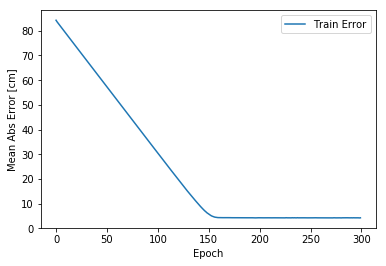

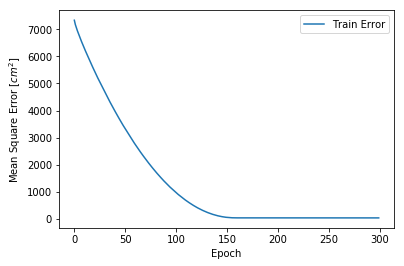


Final Root Mean Square Error on training set:  5.71 cm
Final Root Mean Square Error on Testing set:  5.63 cm


In [109]:
#### Build Model
model = tf.keras.Sequential([
        tf.layers.Dense(1, activation="linear", input_shape=([26])),
#         tf.layers.Dense(2, activation="relu", input_shape=([26])),
#         tf.layers.Dense(2, activation="relu"),
#         tf.layers.Dense(1, activation="relu"),
#         tf.layers.Dense(1)
    ])
optimizer = tf.keras.optimizers.RMSprop(0.03)
model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])
model.summary()

## Model Training
EPOCHS = 300
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
plot_history(history)
rmse_final = np.sqrt(float(hist['mean_squared_error'].tail(1)))
# rmse_val_final = np.sqrt(float(hist['val_mean_squared_error'].tail(1)))
print()
print('Final Root Mean Square Error on training set: {:5.2f} cm'.format(rmse_final))
# print('Final Root Mean Square Error on validation set: {:5.2f} cm'.format(rmse_val_final))

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
rmse_test = np.sqrt(mse)
print("Final Root Mean Square Error on Testing set: {:5.2f} cm".format(rmse_test))

130.15985663082435

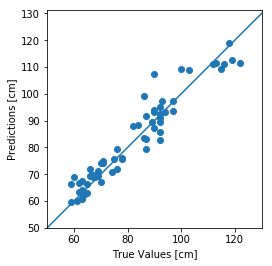

In [106]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [cm]')
plt.ylabel('Predictions [cm]')
plt.axis('equal')
plt.axis('square')
plt.xlim([50,plt.xlim()[1]+5])
plt.ylim([50,plt.ylim()[1]+5])
_ = plt.plot([-100, 160], [-100, 160])
plt.xlim()[1]

In [110]:
# Save Model
# model.save('h1n5.h5')
model = tf.keras.models.load_model('h1n4.h5')

In [111]:
weights = model.get_weights()
weights
with open('wih1.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(weights[0].transpose())
csvFile.close()
with open('bih1.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    for item in weights[1]:
        writer.writerow([item])
csvFile.close()
with open('wo.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(weights[2].transpose())
csvFile.close()
with open('bo.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    for item in weights[3]:
        writer.writerow([item])
csvFile.close()

In [0]:
model = tf.keras.models.load_model('stride_length_model.h5')

In [0]:
test = pd.read_csv('Data/Cobalagi/1558113694-processed.csv',delimiter=',', usecols=list(range(0,26)))
normed_test = norm(test)
normed_test

,acc_x_max,acc_y_max,acc_z_max,acc_x_min,acc_y_min,acc_z_min,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_var,...,gyr_y_min,gyr_z_min,gyr_x_mean,gyr_y_mean,gyr_z_mean,gyr_x_var,gyr_y_var,gyr_z_var,stride_frequency,temperature
0,0.62265,-0.57191,0.610137,-0.839107,0.146166,0.4118,0.626708,-0.057306,-1.564768,0.290929,...,0.930163,-0.838405,-0.726729,-0.115315,-1.347613,-0.236668,-0.566783,0.119969,0.263097,-2.278106


In [0]:
# error = test_predictions - test_labels
error = test_predictions - 88
error
# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [cm]")
# _ = plt.ylabel("Count")

array([-14.003357], dtype=float32)

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model_file("stride_length_model.h5")
tflite_model = converter.convert()
open("stride_length_model.tflite", "wb").write(tflite_model)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.


1272